## SQL ALCHEMY

* RICARDO REYNOSO RAMOS

In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
import seaborn as sns

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, MetaData, inspect
metadata = MetaData()



In [5]:
# Create the engine 
engine = create_engine("sqlite:///hawaii.sqlite")


In [6]:
# reflect an existing database into a new model
Base = automap_base(metadata=metadata)
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
# Call inspector 
session = Session(engine)
inspector=inspect(engine)

In [10]:
# Print Columns from Meaurement and Station to get the content
columns = inspector.get_columns('Measurement')
for column in columns:
   print(column["name"], column["type"],column["primary_key"],column["nullable"])
    

id INTEGER 1 False
station TEXT 0 True
date TEXT 0 True
prcp FLOAT 0 True
tobs FLOAT 0 True


In [11]:
columns = inspector.get_columns('Station')
for column in columns:
   print(column["name"], column["type"],column["primary_key"],column["nullable"])

id INTEGER 1 False
station TEXT 0 True
name TEXT 0 True
latitude FLOAT 0 True
longitude FLOAT 0 True
elevation FLOAT 0 True


In [12]:
# Obtain the first 5 elements from Measurement to identify the data contained into, with engine.execute
display_measurement = engine.execute("SELECT *  from Measurement").fetchall()
#Sort the data into ascending order
display_measurement.sort(reverse=False)
#Print the first 5 elements, apply * to print by space and sep="\n" with a new line
print(*display_measurement[:5], sep="\n")

(1, 'USC00519397', '2010-01-01', 0.08, 65.0)
(2, 'USC00519397', '2010-01-02', 0.0, 63.0)
(3, 'USC00519397', '2010-01-03', 0.0, 74.0)
(4, 'USC00519397', '2010-01-04', 0.0, 76.0)
(5, 'USC00519397', '2010-01-06', None, 73.0)


In [13]:
# Obtain the  elements from Station to identify the data contained into, with engine.execute
display_station = engine.execute("SELECT *  from Station").fetchall()
print(*display_station, sep="\n")

(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
(2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6)
(3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0)
(4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)
(5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)
(6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5)
(7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9)
(8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9)
(9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)


# Exploratory Climate Analysis

* Design a query to retrieve the last 12 months of precipitation data 


In [14]:
# 1 .- To get the 12 months result, first calculate the last day of rainning by querying and filtering the last date, descending=first
# 2.- Store the query into last_day_rain
last_day_rain = (session.query(Measurement.date).order_by(Measurement.date.desc()).first())
# 2.1.- Print the Date, convert from string to Date format by .date property
last_day_rain=last_day_rain.date
last_day_rain

'2017-08-23'

* Calculate the date 1 year ago from the last data point in the database

In [15]:

# 3.- Apply datetime.delta to calculate the difference between those two instances, into rain_twelve_months date
rain_twelve_months_date = dt.datetime.strptime(last_day_rain, '%Y-%m-%d') - dt.timedelta(days=365)
rain_twelve_months_date

datetime.datetime(2016, 8, 23, 0, 0)

* Retrieve the last 12 months of precipitation data


In [16]:
# 4.- Query into Measurement.date and Precipitation properties, filter by date greater than equal to rain_twelve_months_date and group by date
precipitation_12m = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >= rain_twelve_months_date).\
                    group_by(Measurement.date).all()
print(*precipitation_12m[:10], sep="\n")


('2016-08-24', 0.08)
('2016-08-25', 0.08)
('2016-08-26', 0.0)
('2016-08-27', 0.0)
('2016-08-28', 0.01)
('2016-08-29', 0.0)
('2016-08-30', 0.0)
('2016-08-31', 0.13)
('2016-09-01', 0.0)
('2016-09-02', 0.0)


* Save the query results as a Pandas DataFrame and set the index to the date column


In [17]:
# 5.- Put data into dataframe
plot1df=pd.DataFrame(precipitation_12m, columns=(['date', 'prcp']))
plot1df.set_index('date', inplace=True)
plot1df.head(5)

,prcp
date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01


In [18]:
# 6.- Sort the dataframe by date, drop NAs
plot1df = plot1df.sort_values(by ='date' , ascending=True)
plot1df.dropna(axis=1)
plot1df.head(5)

,prcp
date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01


* Use Pandas Plotting with Matplotlib to plot the data


<function matplotlib.pyplot.show(*args, **kw)>

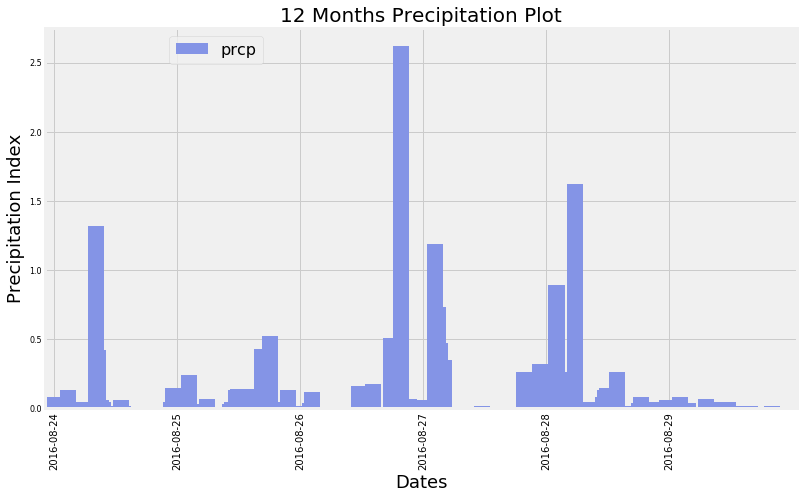

In [19]:
# 7.- Plot the precipitation for the past 12 months
ax = plot1df.plot(kind='bar',figsize=(12,7),  color='#8494E6', width=8)
plt.locator_params(axis='x', nbins=6)
ax.tick_params(axis='y', labelsize=8)
plt.legend(bbox_to_anchor=(.3,1), fontsize="16")
plt.title("12 Months Precipitation Plot", size=20)
plt.ylabel("Precipitation Index", size=18)
plt.xlabel("Dates", size=18)
plt.show

* Print the summary statistics for the precipitation data


In [20]:
# 8.-Print the summary statistics 

plot1df.describe()

,prcp
count,363.000000
mean,0.048843
std,0.205197
min,0.000000
25%,0.000000
50%,0.000000
75%,0.020000
max,2.620000


# Station Analysis

* Design a query to show how many stations are available in this dataset


In [21]:
# 9.- Implement the session query for Station
session.query(Station.id).count() 

9

* Design a query to find the most active stations




In [22]:
# 10.- Get the query from Measurement station and count and grouping, descending from highest to lowest
# List the stations and the counts in descending order.
# What are the most active stations? (i.e. what stations have the most rows)?

most_active = session.query(Measurement.station, func.count(Measurement.station)).\
            group_by(Measurement.station).\
             order_by(func.count(Measurement.station).desc()).all()
print(*most_active, sep="\n")

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


* Using the station id from the previous query, calculate the lowest temperature recorded
* Highest temperature recorded, and average temperature of the most active station


In [23]:
# 11.- Take  USC00519281 , 2772 observations to ge the lowest temp
# Store the data into analisis_1 var, apply the minimum, maximum and average functions from Measurement 

store = [func.min(Measurement.tobs),func.max(Measurement.tobs), func.avg(Measurement.tobs)]      
analisis_1=session.query(*store).filter(Measurement.station=='USC00519281').all()
print(f"The Lowest Temperature: {analisis_1[0][0]}")
print(f"The Highest Temperature: {analisis_1[0][1]}")
print(f"The Average Temperature: {round(analisis_1[0][2], 2)}")

The Lowest Temperature: 54.0
The Highest Temperature: 85.0
The Average Temperature: 71.66


* Choose the station with the highest number of temperature observations.


In [24]:
# 12.- Identify by querying into the stations and number of tobs in comparison with the last 12 months of observations
# store the queries into analisis_2 and the convert into dataFrame to plot in histogram:

analisis_2 = session.query(Measurement.station, Measurement.tobs).\
                filter(Measurement.station == most_active[0][0]).\
                filter(Measurement.date >= rain_twelve_months_date).all()
plot2df = pd.DataFrame(analisis_2)
plot2df.set_index('station', inplace=True)
plot2df.head()

,tobs
station,
USC00519281,77.0
USC00519281,80.0
USC00519281,80.0
USC00519281,75.0
USC00519281,73.0


* Plot the results as a histogram with bins=12.



<function matplotlib.pyplot.show(*args, **kw)>

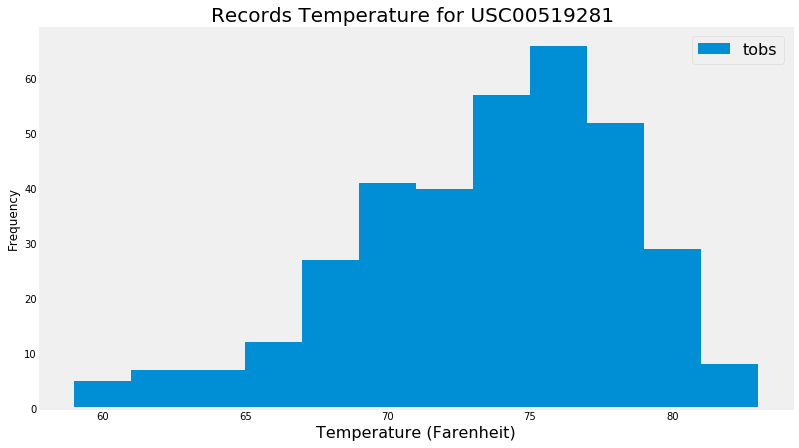

In [25]:
# 13.-lot the results as a histogram with bins=12.
plot2df.plot.hist(by='station', bins=12, figsize=(12,7))
plt.grid()
plt.title("Records Temperature for USC00519281 ", fontsize=20)
plt.xlabel("Temperature (Farenheit)", fontsize=16)
plt.legend(bbox_to_anchor=(1,1), fontsize=16)
plt.show

In [26]:
# 14.- This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [27]:
# 15.- Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

forecast = calc_temps('2017-05-20', '2017-05-29')
forecast

[(69.0, 75.21052631578948, 87.0)]

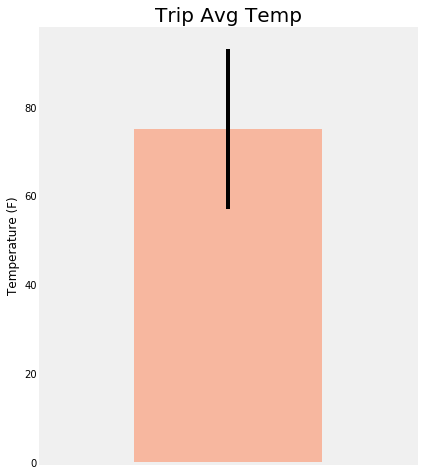

In [28]:
#16.- Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

vacations= pd.DataFrame(forecast, columns=['Min Temp', 'Avg Temp', 'Max Temp'])
vacations_average = vacations['Avg Temp']
calc_weather = vacations.iloc[0]['Max Temp'] - vacations.iloc[0]['Min Temp']
vacations_average.plot(kind='bar', yerr=calc_weather, figsize=(6,8), alpha=0.5, color='coral')
plt.title("Trip Avg Temp", fontsize=20)
plt.ylabel("Temperature (F)")
plt.xticks([])
plt.grid()
plt.show()

In [39]:
# 17.- Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

rain = session.query(Station.station, Station.name, Station.latitude, Station.longitude,
                               Station.elevation, (Measurement.prcp)).\
    filter(Measurement.station == Station.station).\
    filter(func.strftime("%Y-%m-%d", Measurement.date) >= dt.date(2016, 8, 23)).group_by(Station.station).\
    order_by(func.avg(Measurement.prcp).desc()).all()

#load into a dataframe
raindf = pd.DataFrame(rain, columns = ['Station', 'Name', 'Latitude', 'Longitude','Elevation', 'Avg. Precipitation (in.)'])

raindf

,Station,Name,Latitude,Longitude,Elevation,Avg. Precipitation (in.)
0,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,0.70
1,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,1.79
2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,0.15
3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,0.05
4,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,0.02
5,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,NaN
6,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,0.00


## Optional Challenge Assignment

In [30]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [31]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [32]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [33]:
# Plot the daily normals as an area plot with `stacked=False`
